In [6]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import font_manager, rc

## 시도별 문화기반시설 총괄 

In [73]:
total_count = pd.read_csv('data/문화기반시설_총괄표.csv', index_col=0, encoding='UTF-8')
total_df = pd.DataFrame(total_count)
total_df.fillna(0, inplace=True) # NaN 제거 
total_df['total'] = total_df.sum(axis=1) # 행 총합
total_df.sort_values('total', ascending=False) # total 기준, 내림차순 정렬

,국립도서관,공공도서관,박물관,미술관,생활문화센터,문예회관,지방문화원,문화의집,total
시도,,,,,,,,,
경기,1,286,128,54,15,44,31,10,569
서울,3,188,131,47,5,25,25,5,429
강원,0,59,96,20,13,23,18,6,235
전남,0,71,64,35,11,21,22,4,228
경남,0,75,76,10,11,22,20,14,228
경북,0,69,76,11,8,27,23,6,220
전북,0,63,42,18,14,17,14,12,180
충남,0,63,58,8,8,18,15,6,176
충북,0,50,44,11,3,12,11,7,138


## 문화시설 시군구별 개수 

In [60]:
sigungu_count = pd.read_csv('data/문화기반시설_시군구_정리.csv', index_col=0, encoding='UTF-8')
sigungu_count

,시설 수,shortName,x,y,광역시도,행정구역
시군구,,,,,,
강남구,28,서울강남,6,7,서울특별시,강남구
강동구,13,서울강동,8,5,서울특별시,강동구
강북구,12,서울강북,5,2,서울특별시,강북구
강서구,15,서울강서,4,4,서울특별시,강서구
관악구,11,서울관악,5,6,서울특별시,관악구
...,...,...,...,...,...,...
함안군,5,함안,7,17,경상남도,함안군
함양군,4,함양,6,16,경상남도,함양군
합천군,6,합천,7,14,경상남도,합천군


In [61]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

gamma = 0.75

blockedMap = sigungu_count
targetData = '시설 수'

whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

datalabel = targetData

vmin = min(blockedMap[targetData])
vmax = max(blockedMap[targetData])

mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,13.0,13.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,11.0,21.0,6.0,15.0,8.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,41.0,39.0,12.0,24.0,7.0,15.0,12.0,5.0,NaN,NaN,NaN
3,NaN,11.0,15.0,11.0,16.0,14.0,66.0,9.0,26.0,10.0,30.0,NaN,NaN,NaN
4,NaN,13.0,27.0,16.0,15.0,13.0,27.0,12.0,6.0,6.0,8.0,30.0,NaN,NaN
5,NaN,5.0,9.0,16.0,12.0,8.0,18.0,15.0,13.0,8.0,6.0,7.0,NaN,NaN
6,NaN,NaN,13.0,28.0,11.0,11.0,22.0,11.0,21.0,17.0,12.0,11.0,NaN,4.0
7,NaN,18.0,10.0,29.0,15.0,7.0,28.0,11.0,15.0,18.0,21.0,8.0,NaN,NaN
8,4.0,19.0,10.0,12.0,13.0,9.0,8.0,28.0,12.0,14.0,28.0,9.0,NaN,NaN


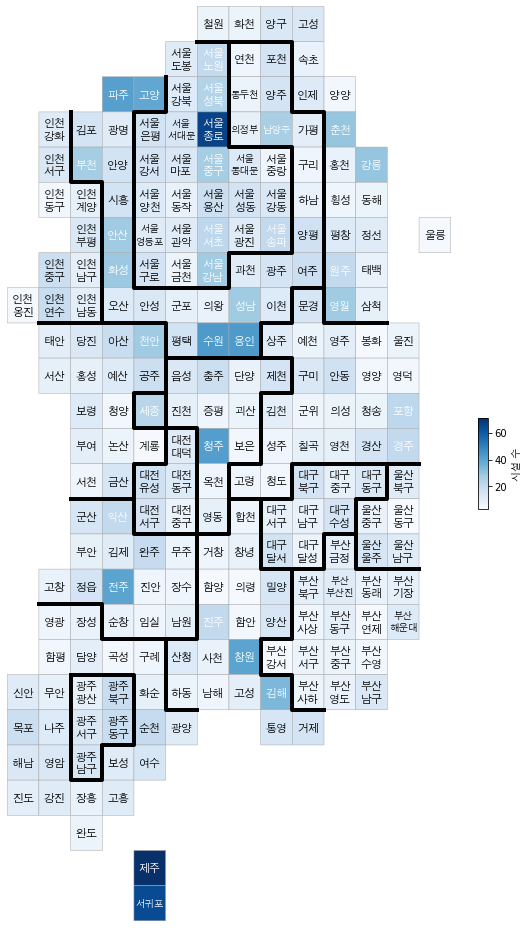

In [67]:
cmapname = 'Blues' #'Reds'

plt.figure(figsize=(8, 13))
plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

# 지역 이름 표시
for idx, row in blockedMap.iterrows():
    annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
    if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
        dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
        if len(row['행정구역']) <= 2:
            dispname += row['행정구역'][-1]
    else:
        dispname = row['행정구역'][:-1]

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', color=annocolor,
                 linespacing=linespacing, font='AppleGothic')
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=4)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')
    
cb = plt.colorbar(shrink=.1, aspect=10)
cb.set_label(datalabel, font='AppleGothic')

plt.tight_layout()
plt.show()

## 100만 명당 문화기반시설 비율 